# Customer Churn

Uses data from Super Data Science's Deep Learning A-Z Class.

Joseph J. Bautista

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [4]:
df = df[['Geography', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', \
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [5]:
df.columns.values

array(['Geography', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'], dtype=object)

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Gender Numerical'] = df['Gender'].str.replace('Male', '0').str.replace('Female', '1').astype(int)
df['Geography Numerical'] = df['Geography'].str.replace('France', '0').str.replace('Spain', '1').str.replace('Germany', '2').astype(int)

In [10]:
y = df['Exited']
X = df[['Geography Numerical', 'CreditScore', 'Gender Numerical', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

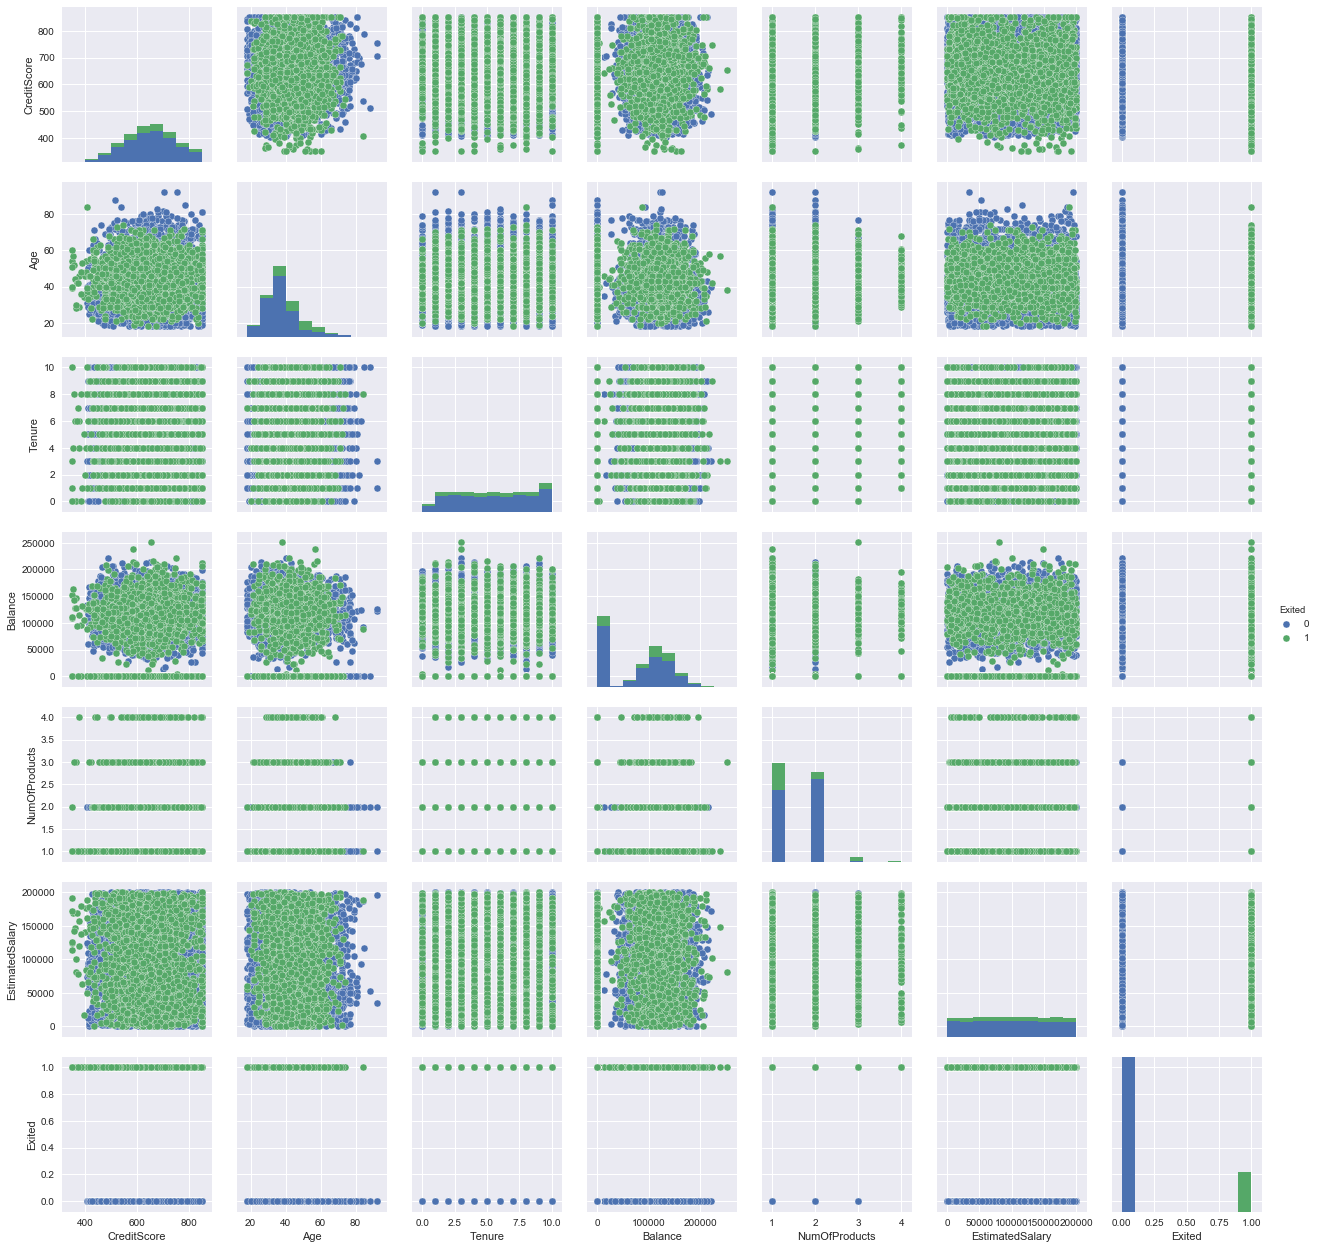

In [11]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']], hue="Exited")

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = to_categorical(y)

In [13]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print X.shape
print y.shape

(10000, 10)
(10000, 2)


In [15]:
model = Sequential()

model.add(Dense(units=20, input_shape=(X.shape[1],)))
model.add(Activation(LeakyReLU()))

model.add(Dense(units=30))
model.add(Activation(LeakyReLU()))

model.add(Dense(units=20))
model.add(Activation(LeakyReLU()))

model.add(Dense(units=y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/JosephBautista/anaconda/lib/python2.7/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


In [16]:
model.fit(X_train, y_train, epochs=20, validation_split=0.10)

Train on 6030 samples, validate on 670 samples
Epoch 1/20
6030/6030 [==============================] - 3s - loss: 0.4952 - acc: 0.7731 - val_loss: 0.4225 - val_acc: 0.8164
Epoch 2/20
6030/6030 [==============================] - 0s - loss: 0.4139 - acc: 0.8282 - val_loss: 0.3953 - val_acc: 0.8448
Epoch 3/20
6030/6030 [==============================] - 0s - loss: 0.3812 - acc: 0.8471 - val_loss: 0.3731 - val_acc: 0.8433
Epoch 4/20
6030/6030 [==============================] - 1s - loss: 0.3639 - acc: 0.8507 - val_loss: 0.3710 - val_acc: 0.8448
Epoch 5/20
6030/6030 [==============================] - 1s - loss: 0.3581 - acc: 0.8534 - val_loss: 0.3668 - val_acc: 0.8463
Epoch 6/20
6030/6030 [==============================] - 0s - loss: 0.3554 - acc: 0.8524 - val_loss: 0.3628 - val_acc: 0.8433
Epoch 7/20
6030/6030 [==============================] - 1s - loss: 0.3515 - acc: 0.8566 - val_loss: 0.3653 - val_acc: 0.8448
Epoch 8/20
6030/6030 [==============================] - 1s - loss: 0.3496 - ac

In [17]:
# ['Geography Numerical', 'CreditScore', 'Gender Numerical', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
# Geog: France 0
# CrScore: 600
# Gender: Male 0
# Age: 40
# Tenure: 3
# Balance: 60k
# NumProd: 2
# HasCRCard: 1
# IsActive: 1
# EstimatedSalary: 50k

predict_this = np.array([0, 600, 0, 40, 3, 60000, 2, 1, 1, 50000]).reshape(1,10)

In [18]:
print X_train.shape
print predict_this.shape

(6700, 10)
(1, 10)


In [19]:
# Therefore, we should dump this customer since this customer will exit.
model.predict(predict_this)

array([[ 0.,  1.]], dtype=float32)

In [20]:
df['Exited'].head(3)
# Exited
# Not
# Exited

0    1
1    0
2    1
Name: Exited, dtype: int64

In [21]:
y[0:3]
# Left not exited, Right Exited; Soooo....
# Exited
# Not exited
# Exited

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [22]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [23]:
accuracy_score(y_pred_class, y_test_class)

0.86484848484848487

In [24]:
model.evaluate(X_test, y_test)

2272/3300 [===================>..........] - ETA: 0s

[0.33849974520278697, 0.86484848484848487]

In [25]:
CM = confusion_matrix(y_test_class, y_pred_class)

In [26]:
TP = CM[1, 1]
TN = CM[0, 0]
FP = CM[0, 1]
FN = CM[1, 0]

In [27]:
# CLASSIFICATION ACCURACY
print (TP + TN) / float(TP + TN + FP + FN)

0.864848484848


In [28]:
# CLASSIFICATION ERROR
print (FP + FN) / float(TP + TN + FP + FN)

0.135151515152


In [29]:
# Sensitivity: How sensitive is the model in predicting positive instances?
print TP / float(TP + FN)

0.52099533437


In [30]:
# Specificity: When it's actually no, how often does it predict no?
# True Negative Rate
print TN / float(TN + FP)

0.948061723749


In [31]:
# False Positive Rate: When it's actually no, how often does it predict yes?
print FP / float(TN + FP)

0.0519382762514


In [32]:
# Precision: When it predicts yes, how often is it correct?
print TP / float(TP + FP)

0.708245243129
